In [1]:
# 1 .algorithm (synthesis Dataset):
# step 1 importing required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#step 2 creating a dataframe with dependent variable(x) and independent var y

x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [3]:
#step 3 : Creating linear regression Model using Polyfit fun

model=np.polyfit(x,y,1)

In [4]:
#step 4: observer the coefficients  of model

model

array([ 0.64383562, 26.78082192])

In [6]:
#step5: predict the y value forx and observer o/p
predict=np.poly1d(model)
predict(65)

68.63013698630135

In [7]:
#step6: precit the y_pred for all values of x
y_pred=predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [8]:
#step7: evaluate the performance of model(R-suare)
# as R squared  calculation is not impemented in numpy we take it from sklearn library

from sklearn.metrics import r2_score
r2_score(y,y_pred)


0.4803218090889323

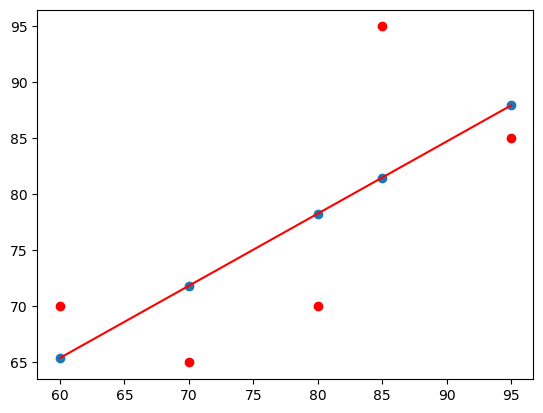

In [10]:
#step8: plotting regression model
y_line=model[1]+model[0]*x
plt.plot(x,y_line,c='r')
plt.scatter(x,y_pred)
plt.scatter(x,y,c='r')

In [44]:
#2. Algorithm(Boston Dataset):

#step1 importing libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
#step2:importing the boston housing dataset


from sklearn.datasets import load_boston
boston=load_boston()

In [53]:
#Step3: initialize the data frame

data = pd.DataFrame(boston.data)


In [54]:
#step4: add the feature names to the dataframe

data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
#step5: adding the target variable to dataframe
data['PRICE']=boston.target

In [20]:
#step 6: perform data preprocessing(check for missing values)
data.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [21]:
#step7:split dependent variable and independent variables

x=data.drop(['PRICE'],axis=1)
y=data['PRICE']


In [23]:
#step8:splitting data to training and testing dataset

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)


In [25]:
#step9:use linear regression(train the machine)to create model

import sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [28]:
#step10:predict the y_pred for all values of train_x and test_x
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)


In [32]:
#step 11: Evaluate the performance of model for train_y and test_y

df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [36]:
#step12: calculate mean square paper for train_y and test_y

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ytest_pred)
print(mse)


33.44897999767643


In [37]:
mse=mean_squared_error(ytrain_pred,ytrain)
print(mse)

19.32647020358573


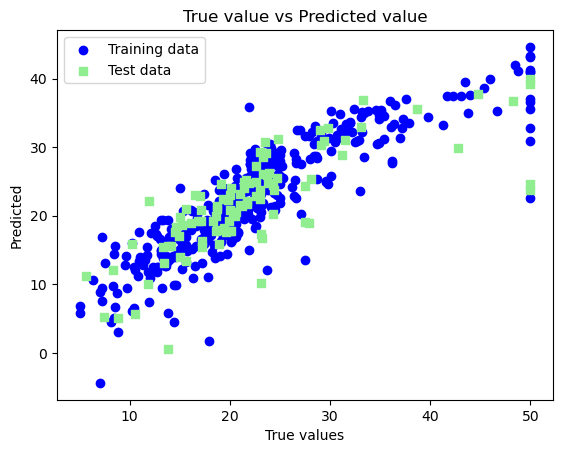

In [42]:
#step13:plotting the linear regression model

plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()

In [ ]:
#end